In [18]:
from diffusion_policy.dataset.real_pusht_image_dataset import RealPushTImageDataset

In [31]:
dataset_path = "/home/tlips/Code/diffusion_policy/data/demo_pick_cb"
import os 
os.path.exists(dataset_path)


True

In [38]:
n_latency_steps = 0
n_obs_steps = 2
n_action_steps = 8
horizon = 16

shape_meta = {
    "obs": {
        "camera_0": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "camera_1": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "robot_eef_pose_6d_rot": {
            "shape": [9],
            "type": "low_dim"
        },
        "gripper_width" :{
            "shape": [1],
            "type": "low_dim",
        }
    },
    "action": {
        "shape": [10]
    }
}

from omegaconf import OmegaConf
shape_meta = OmegaConf.create(shape_meta)

dataset = RealPushTImageDataset(shape_meta=shape_meta, dataset_path=dataset_path, horizon=horizon, pad_before=n_obs_steps-1+n_latency_steps, pad_after=n_action_steps-1, n_obs_steps=n_obs_steps, n_latency_steps=n_latency_steps, use_cache=True, seed=42, val_ratio=0.00, max_train_episodes=None, delta_action=False)

Acquiring lock on cache.
Loading cached ReplayBuffer from Disk.
Loaded!


In [39]:

dataset.replay_buffer

/
 ├── data
 │   ├── action (9963, 10) float64
 │   ├── camera_0 (9963, 240, 320, 3) uint8
 │   ├── camera_1 (9963, 240, 320, 3) uint8
 │   ├── gripper_width (9963, 1) float64
 │   └── robot_eef_pose_6d_rot (9963, 9) float64
 └── meta
     └── episode_ends (55,) int64

In [40]:
dataset.get_validation_dataset().replay_buffer

/
 ├── data
 │   ├── action (9963, 10) float64
 │   ├── camera_0 (9963, 240, 320, 3) uint8
 │   ├── camera_1 (9963, 240, 320, 3) uint8
 │   ├── gripper_width (9963, 1) float64
 │   └── robot_eef_pose_6d_rot (9963, 9) float64
 └── meta
     └── episode_ends (55,) int64

Episode 0


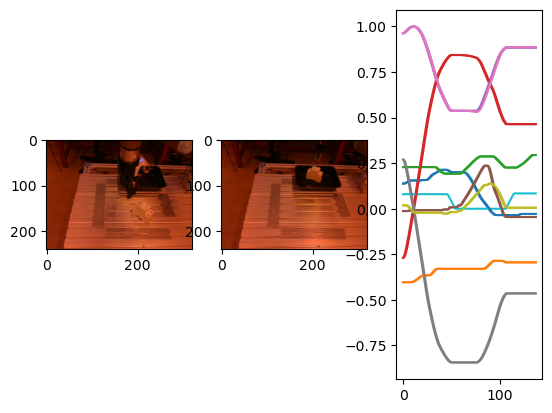

Episode 1


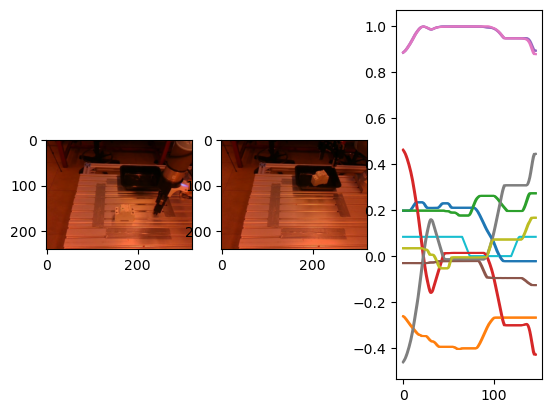

Episode 2


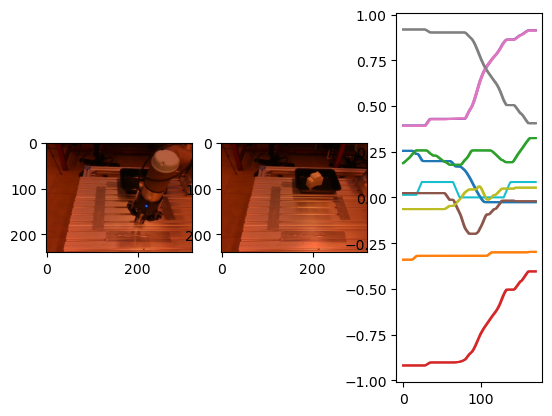

Episode 3


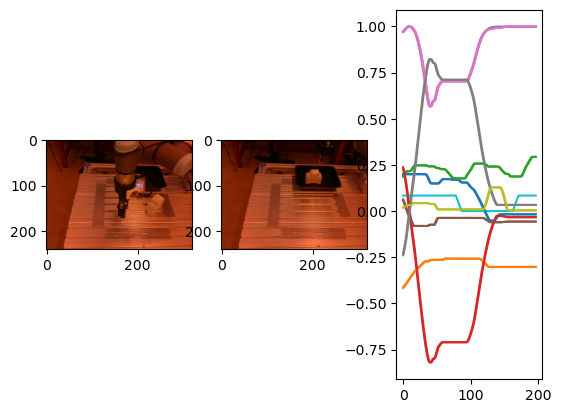

Episode 4


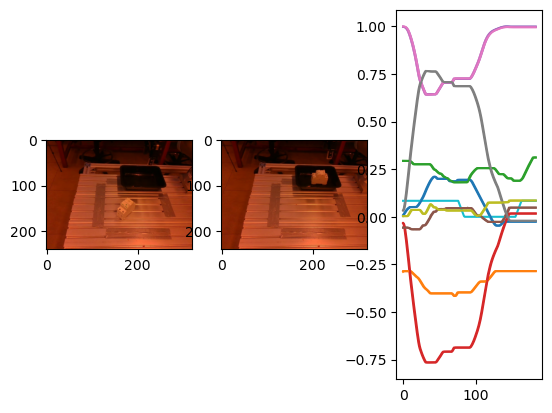

Episode 5


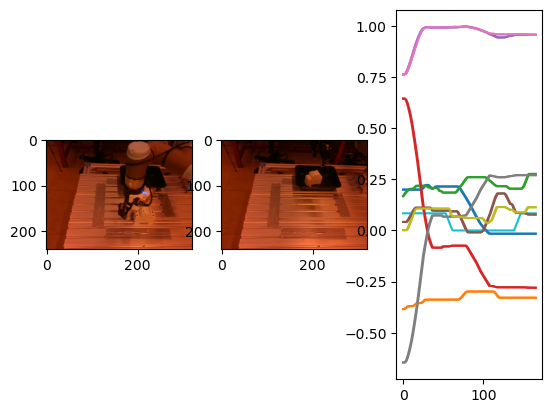

Episode 6


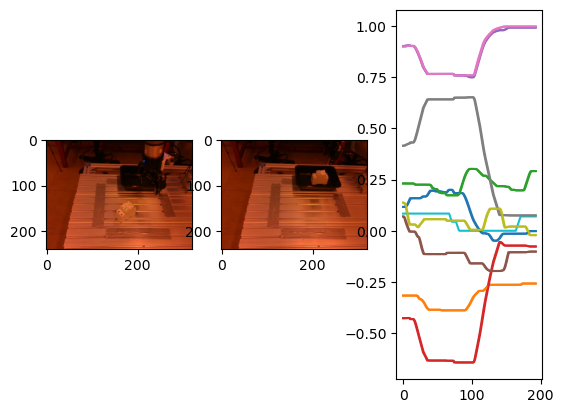

Episode 7


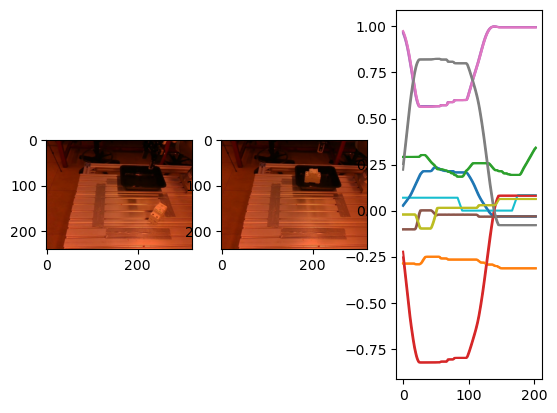

Episode 8


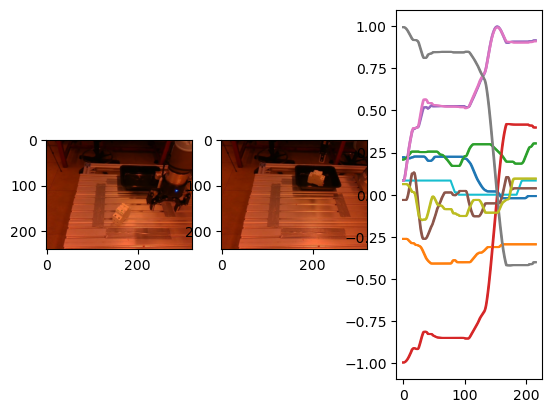

Episode 9


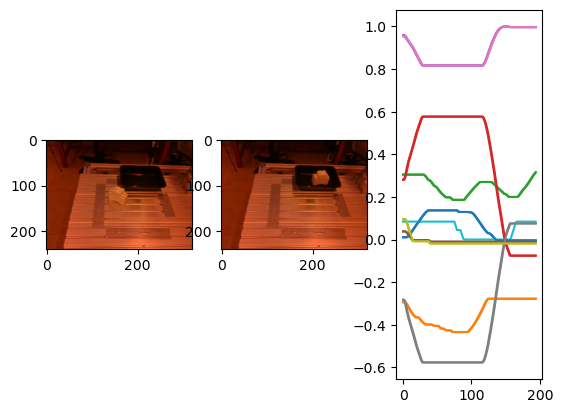

Episode 10


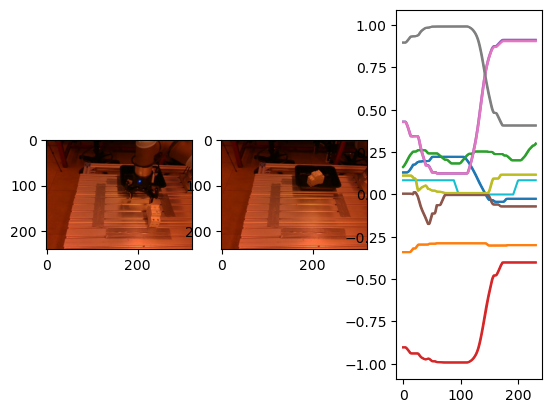

Episode 11


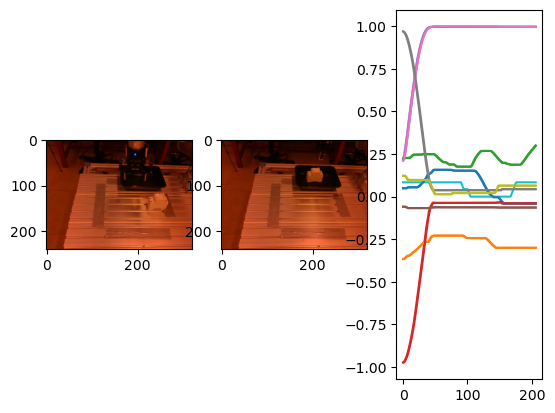

Episode 12


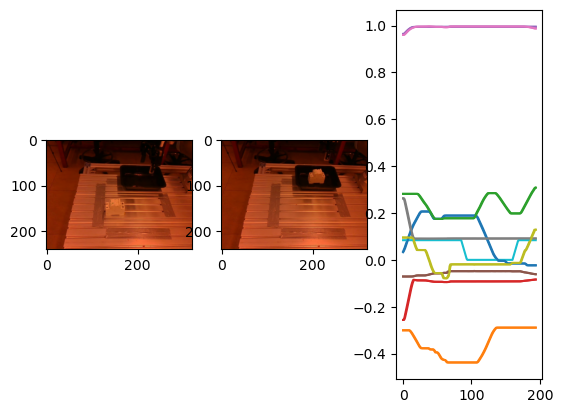

Episode 13


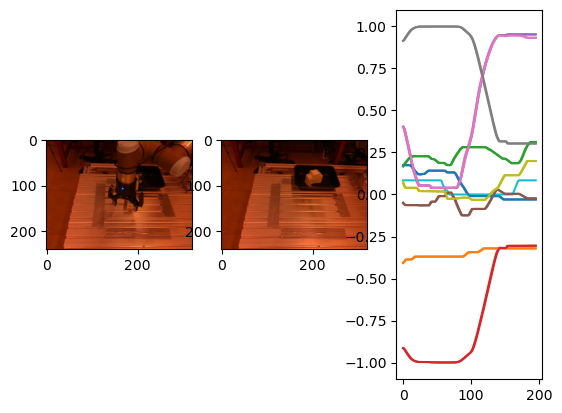

Episode 14


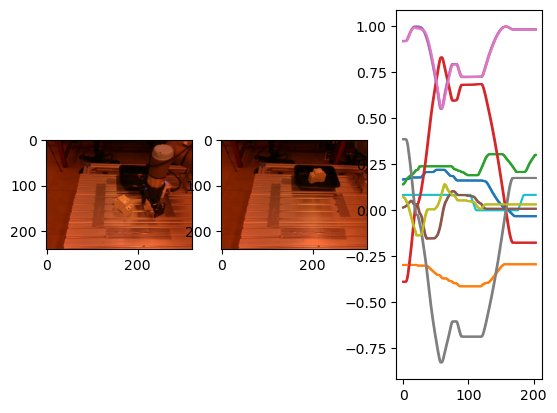

Episode 15


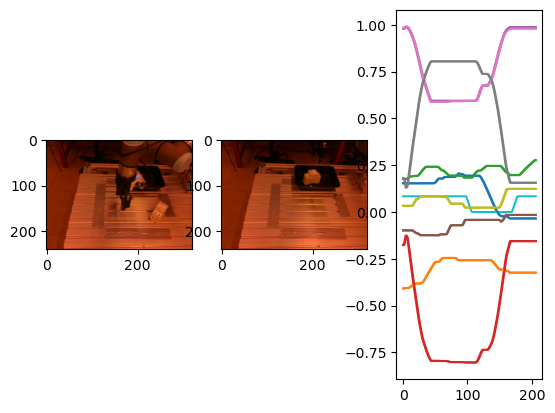

Episode 16


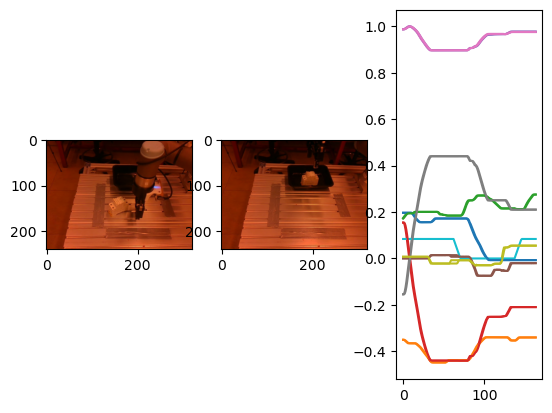

Episode 17


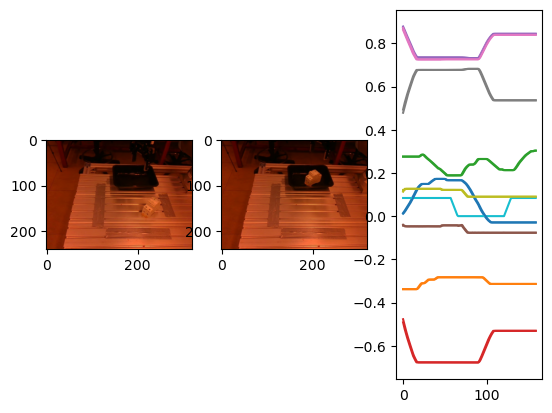

Episode 18


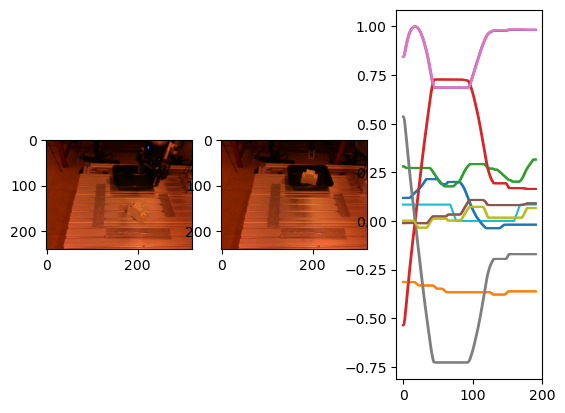

Episode 19


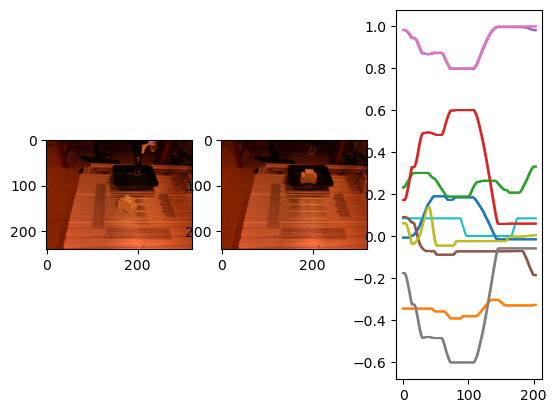

Episode 20


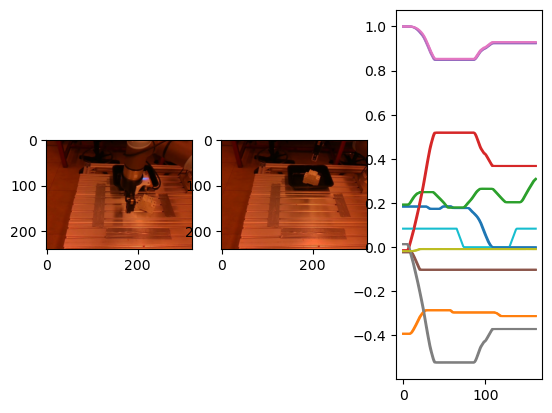

Episode 21


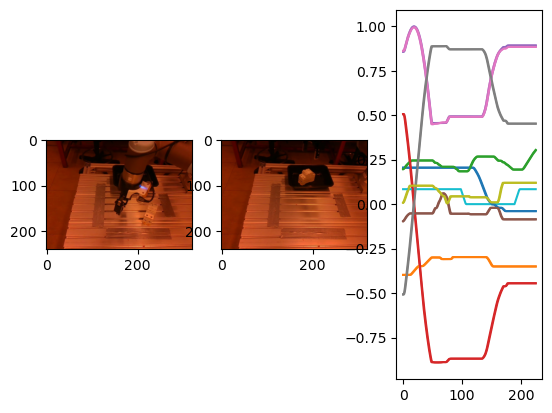

Episode 22


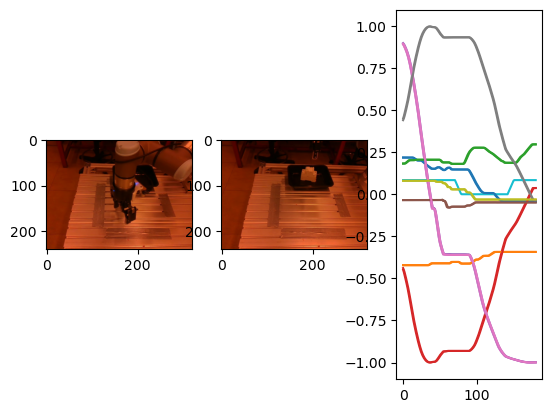

Episode 23


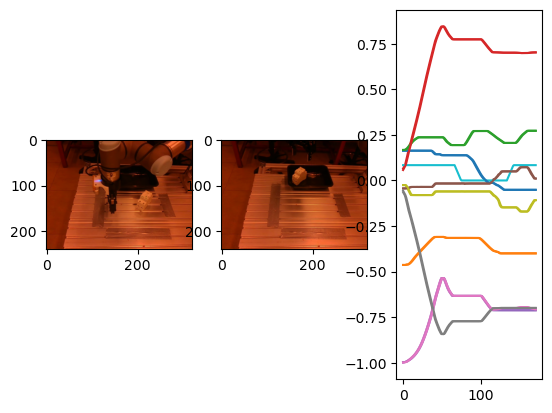

Episode 24


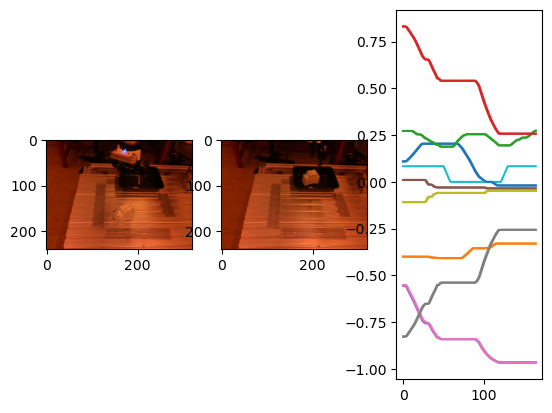

Episode 25


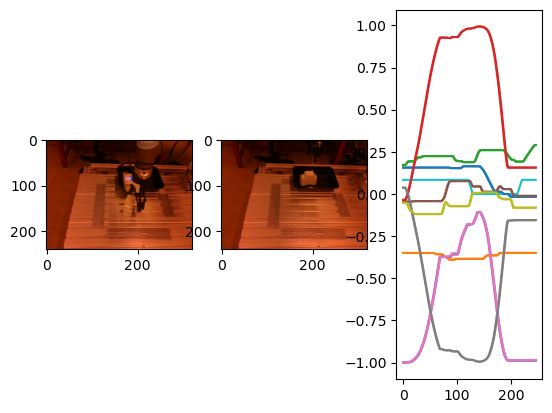

Episode 26


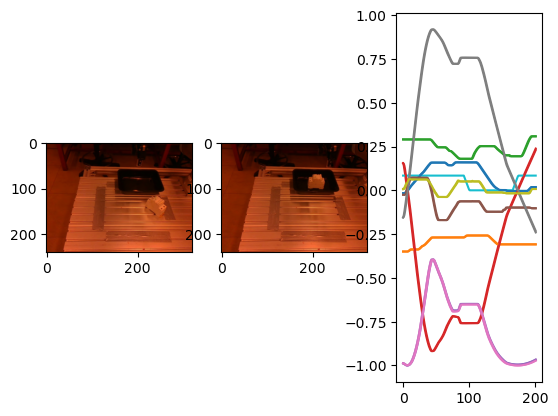

Episode 27


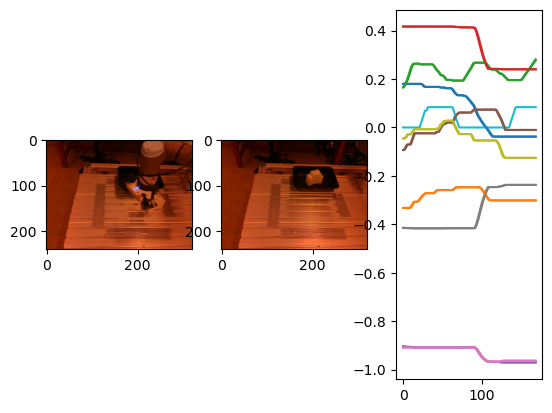

Episode 28


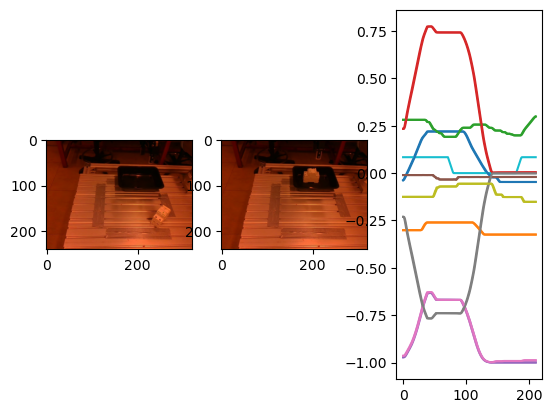

Episode 29


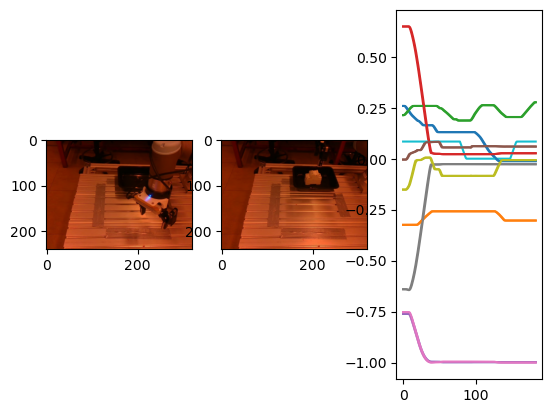

Episode 30


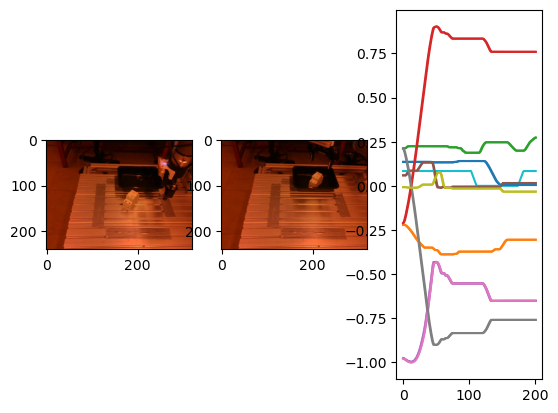

Episode 31


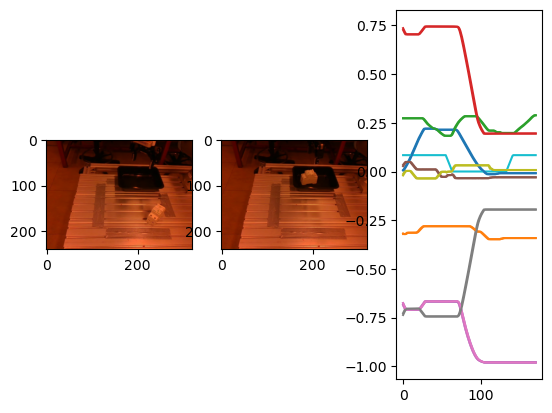

Episode 32


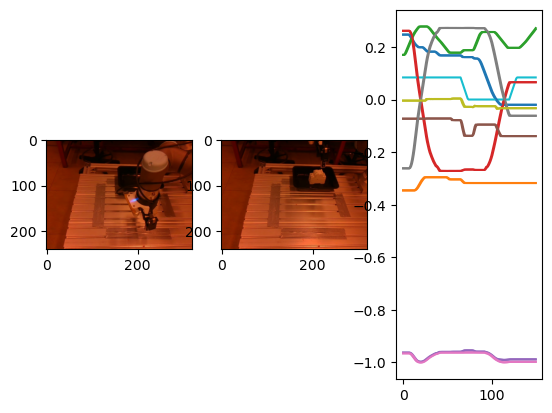

Episode 33


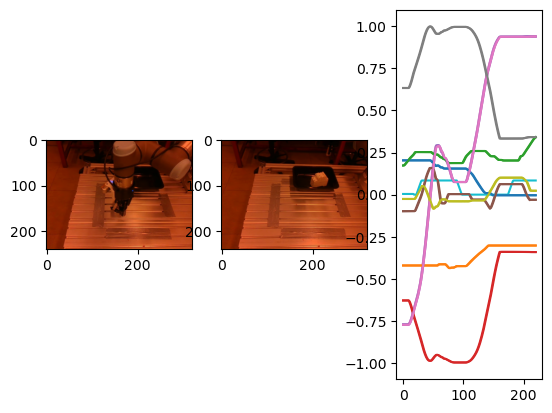

Episode 34


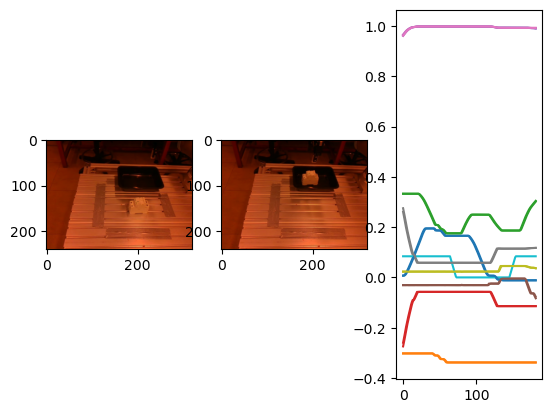

Episode 35


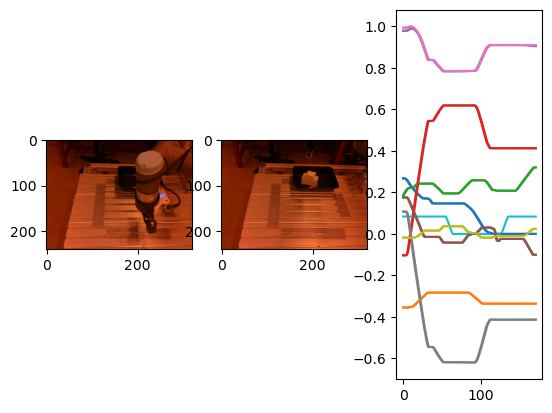

Episode 36


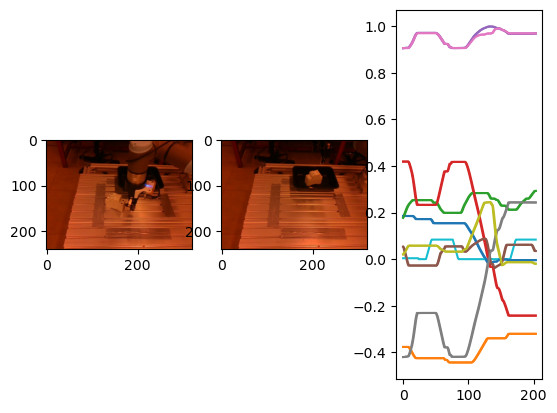

Episode 37


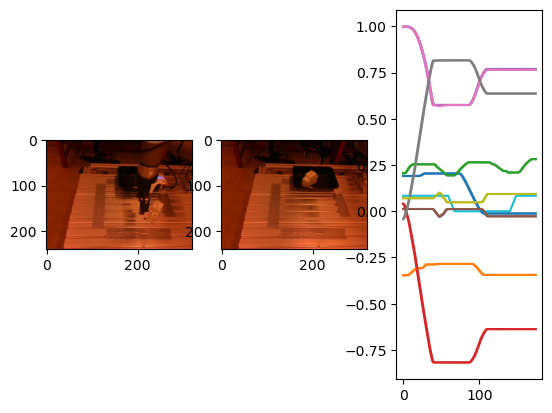

Episode 38


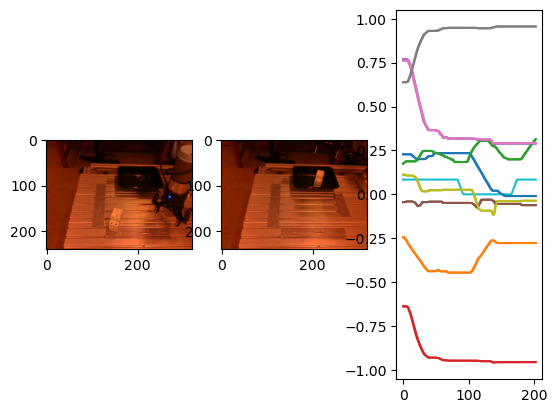

Episode 39


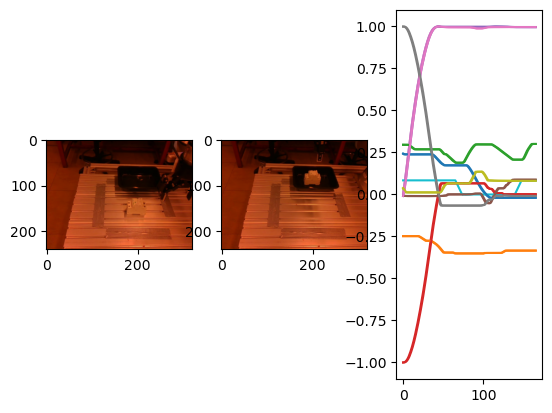

Episode 40


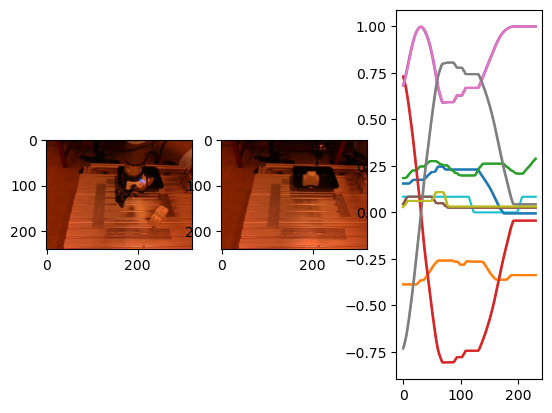

Episode 41


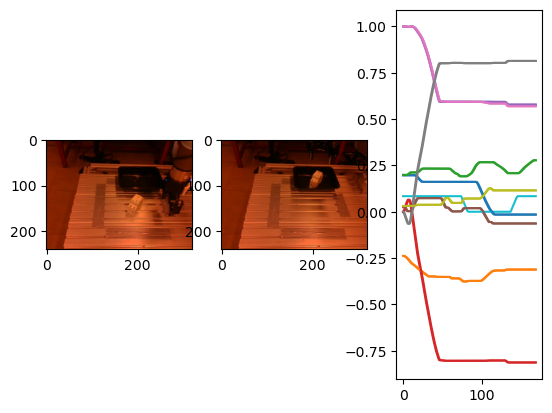

Episode 42


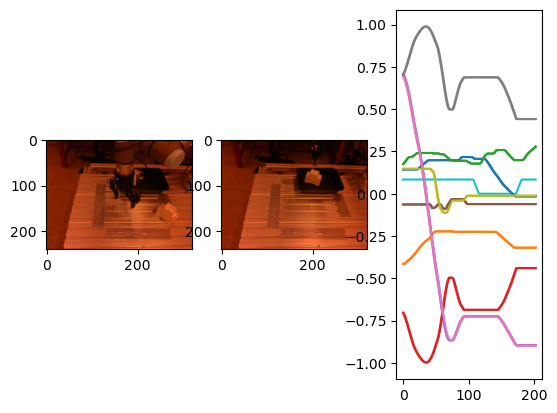

Episode 43


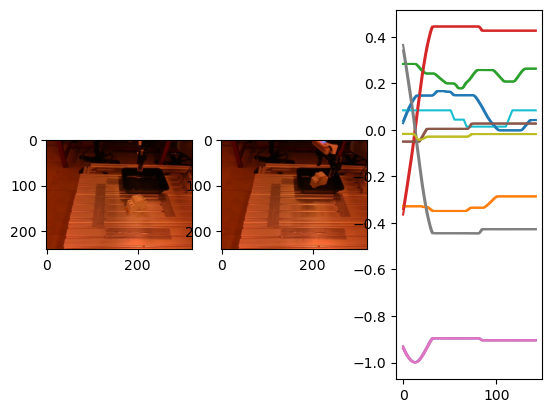

Episode 44


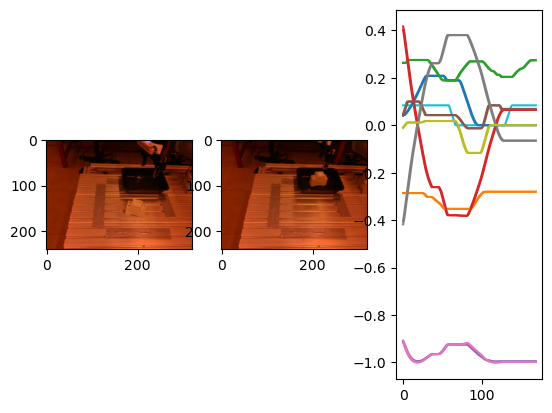

Episode 45


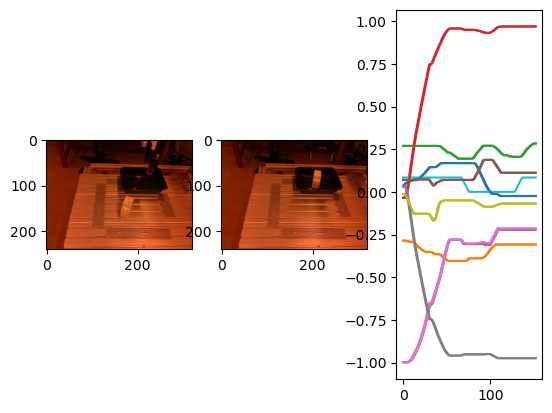

Episode 46


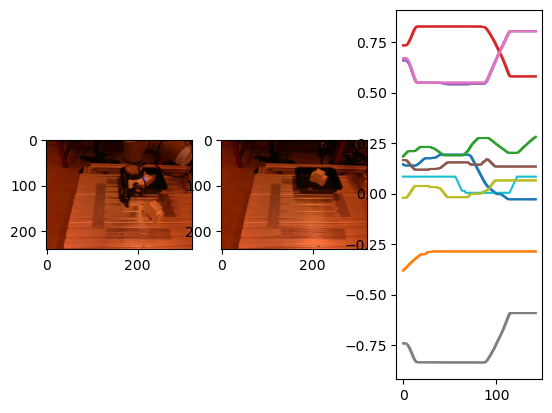

Episode 47


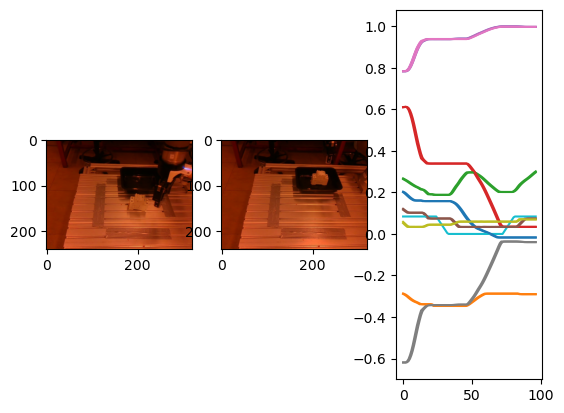

Episode 48


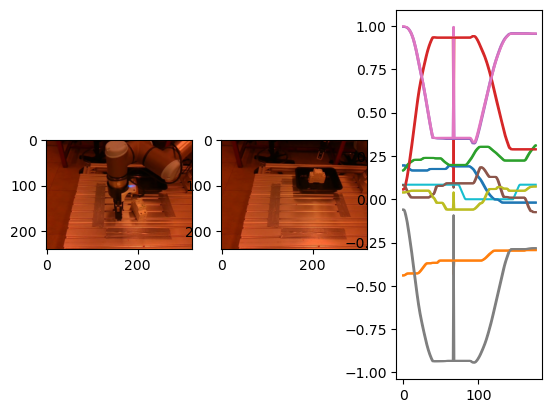

Episode 49


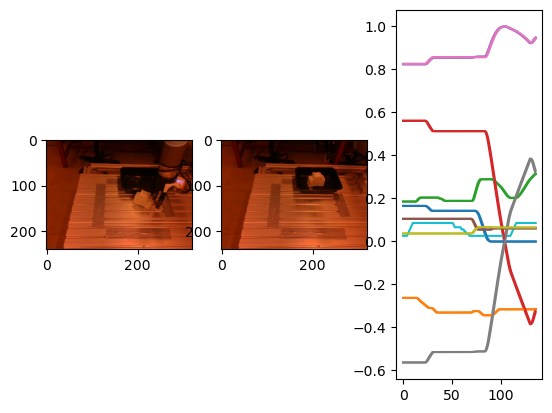

Episode 50


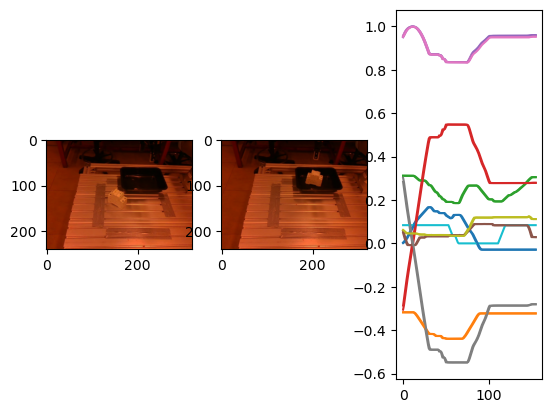

Episode 51


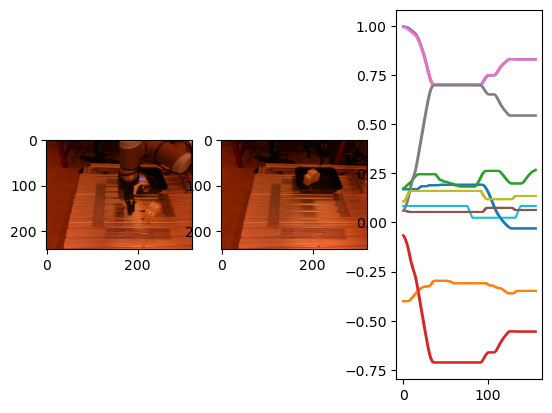

Episode 52


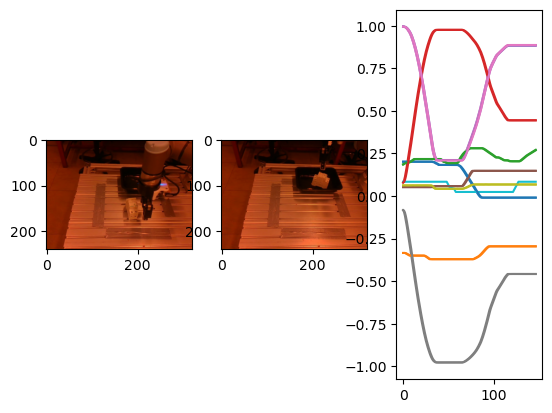

Episode 53


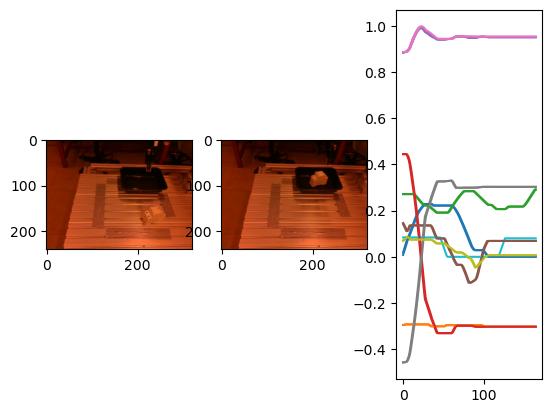

Episode 54


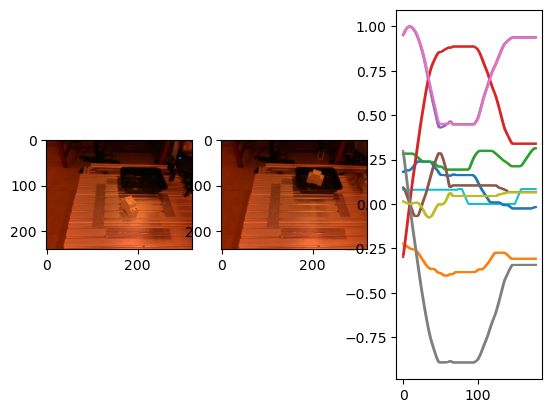

In [41]:
buffer = dataset.replay_buffer
for episode_idx in range(len(buffer.meta.episode_ends)):
    print(f"Episode {episode_idx}")
    episode = buffer.get_episode(episode_idx)
    # get all images "camera_0 from the episode
    images = episode["camera_0"]
    # show first image and last image
    import matplotlib.pyplot as plt
    # side by side
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(images[0])
    ax[1].imshow(images[-1])
    # display state and action 
    actions = episode["action"]
    eef_pose = episode["robot_eef_pose_6d_rot"]
    ax[2].plot(actions)
    ax[2].plot(eef_pose)
    plt.show()



(138, 9)
(138, 10)
(138, 1)


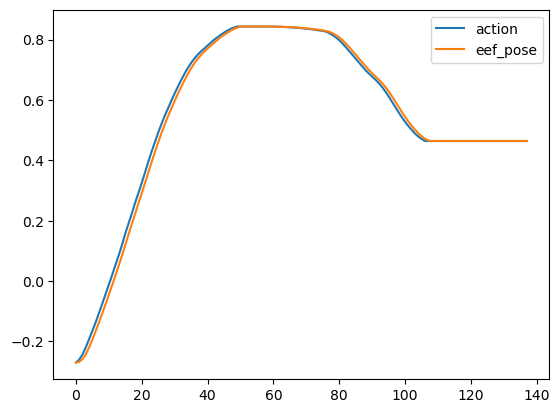

In [42]:
# detailed plot of observations vs actions
import numpy as np
import matplotlib.pyplot as plt
buffer = dataset.replay_buffer
episode_idx = 0
episode = buffer.get_episode(episode_idx)
actions = episode["action"]
eef_pose = episode["robot_eef_pose_6d_rot"]
print(eef_pose.shape)
print(actions.shape)
g = episode["gripper_width"]
# add new dim 
print(g.shape)
plt.plot(actions[:, 3])
plt.plot(eef_pose[:, 3])
plt.legend(["action", "eef_pose"])
